# Testing new mean error calculations

## Setup

### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir
import pandas as pd
import pickle
import sys
from tqdm import tqdm

sys.path.append('../../../stationsim/')

from ensemble_kalman_filter import EnsembleKalmanFilter, EnsembleKalmanFilterType, ActiveAgentNormaliser
from stationsim_gcs_model import Model

sys.path.append('../')

from experiment_utils import Modeller, Processor, Visualiser

%matplotlib inline

### Functions

In [2]:
def __make_exit_observation_operator(population_size):
    a = np.identity(2 * population_size)
    b = np.zeros(shape=(2 * population_size, population_size))
    return np.hstack((a, b))


def __make_observation_operator(population_size, mode):
    if mode == EnsembleKalmanFilterType.STATE:
        return np.identity(2 * population_size)
    elif mode == EnsembleKalmanFilterType.DUAL_EXIT:
        return __make_exit_observation_operator(population_size)
    else:
        raise ValueError(f'Unexpected filter mode: {mode}')

        
def __make_state_vector_length(population_size, mode):
    if mode == EnsembleKalmanFilterType.STATE:
        return 2 * population_size
    elif mode == EnsembleKalmanFilterType.DUAL_EXIT:
        return 3 * population_size
    else:
        raise ValueError(f'Unexpected filter mode: {mode}')

        
def run_enkf(filter_params, model_params, normaliser, station, pickle_path, filter_id):
    # Set up filter params
    filter_params['error_normalisation'] = normaliser
    model_params['station'] = station
    
    enkf = EnsembleKalmanFilter(Model, filter_params, model_params,
                                filtering=True, benchmarking=True)
    
    while enkf.active:
        enkf.step()
    norm = normaliser.name if normaliser is not None else 'default'
    mt = station if station is not None else 'toy'
    
    
    s = pickle_path + f'filter_{mt}_{norm}_{filter_id}.pkl'
    
    with open(s, 'wb') as f:
        pickle.dump(enkf, f)

### Constants and default parameter values

In [3]:
ensemble_size = 20
pop_size = 20
assimilation_period = 20
obs_noise_std = 1.0
mode = EnsembleKalmanFilterType.STATE
its = 20000

model_params = {'pop_total': pop_size,
                'do_print': False}

# Set up filter parameters
observation_operator = __make_observation_operator(pop_size, mode)
state_vec_length = __make_state_vector_length(pop_size, mode)
data_mode = EnsembleKalmanFilterType.STATE
data_vec_length = __make_state_vector_length(pop_size, data_mode)

filter_params = {'max_iterations': its,
                 'assimilation_period': assimilation_period,
                 'ensemble_size': ensemble_size,
                 'population_size': pop_size,
                 'vanilla_ensemble_size': ensemble_size,
                 'state_vector_length': state_vec_length,
                 'data_vector_length': data_vec_length,
                 'mode': mode,
                 'H': observation_operator,
                 'R_vector': obs_noise_std * np.ones(data_vec_length),
                 'keep_results': True,
                 'run_vanilla': True,
                 'vis': False}

In [4]:
normalisers = (None,
               ActiveAgentNormaliser.BASE,
               ActiveAgentNormaliser.MEAN_EN)

In [5]:
stations = (None, 'Grand_Central')

In [6]:
pickle_path = '../results/models/gcs_model/norm/'

## Run filters

Make list of parameter combos to be provided to function:

In [7]:
param_combos = list()

for normaliser in normalisers:
    for station in stations:
        for i in range(10):
            x = (filter_params, model_params, normaliser, station, pickle_path, i)
            param_combos.append(x)

In [8]:
for pc in tqdm(param_combos):
    print(pc[2], pc[3])
    run_enkf(*pc)

  0%|          | 0/60 [00:00<?, ?it/s]../../../stationsim/ensemble_kalman_filter.py:149: RuntimeWarning: EnKF received unexpected vanilla_ensemble_size attribute.
  warns.warn(w, RuntimeWarning)


None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  2%|▏         | 1/60 [00:56<55:12, 56.15s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  3%|▎         | 2/60 [01:59<58:14, 60.25s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  5%|▌         | 3/60 [03:01<58:16, 61.35s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  7%|▋         | 4/60 [03:44<50:16, 53.87s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  8%|▊         | 5/60 [04:45<51:54, 56.63s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 10%|█         | 6/60 [05:55<55:01, 61.14s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 12%|█▏        | 7/60 [06:59<54:45, 61.99s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 13%|█▎        | 8/60 [08:06<55:07, 63.61s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 15%|█▌        | 9/60 [09:22<57:27, 67.60s/it]

None None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 17%|█▋        | 10/60 [10:19<53:31, 64.23s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 18%|█▊        | 11/60 [12:12<1:04:37, 79.14s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 20%|██        | 12/60 [14:01<1:10:35, 88.25s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 22%|██▏       | 13/60 [15:44<1:12:37, 92.71s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 23%|██▎       | 14/60 [18:19<1:25:25, 111.42s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 25%|██▌       | 15/60 [20:33<1:28:42, 118.28s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 27%|██▋       | 16/60 [21:45<1:16:32, 104.38s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 28%|██▊       | 17/60 [23:51<1:19:24, 110.81s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 30%|███       | 18/60 [25:41<1:17:23, 110.57s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 32%|███▏      | 19/60 [27:45<1:18:21, 114.68s/it]

None Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 33%|███▎      | 20/60 [29:36<1:15:38, 113.45s/it]

ActiveAgentNormaliser.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 35%|███▌      | 21/60 [30:43<1:04:47, 99.68s/it] 

ActiveAgentNormaliser.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 37%|███▋      | 22/60 [31:39<54:44, 86.43s/it]  

ActiveAgentNormaliser.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 38%|███▊      | 23/60 [32:25<45:55, 74.48s/it]

ActiveAgentNormaliser.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 40%|████      | 24/60 [33:09<39:02, 65.08s/it]

ActiveAgentNormaliser.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 42%|████▏     | 25/60 [34:01<35:41, 61.19s/it]

ActiveAgentNormaliser.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 43%|████▎     | 26/60 [34:54<33:22, 58.89s/it]

ActiveAgentNormaliser.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 45%|████▌     | 27/60 [35:49<31:41, 57.61s/it]

ActiveAgentNormaliser.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 47%|████▋     | 28/60 [37:06<33:52, 63.51s/it]

ActiveAgentNormaliser.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 48%|████▊     | 29/60 [37:59<31:05, 60.19s/it]

ActiveAgentNormaliser.BASE None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 50%|█████     | 30/60 [38:58<29:58, 59.96s/it]

ActiveAgentNormaliser.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 52%|█████▏    | 31/60 [40:33<34:06, 70.57s/it]

ActiveAgentNormaliser.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 53%|█████▎    | 32/60 [42:14<37:12, 79.71s/it]

ActiveAgentNormaliser.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 55%|█████▌    | 33/60 [43:53<38:25, 85.38s/it]

ActiveAgentNormaliser.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 57%|█████▋    | 34/60 [46:00<42:23, 97.83s/it]

ActiveAgentNormaliser.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 58%|█████▊    | 35/60 [48:37<48:07, 115.50s/it]

ActiveAgentNormaliser.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 60%|██████    | 36/60 [50:16<44:13, 110.56s/it]

ActiveAgentNormaliser.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 62%|██████▏   | 37/60 [52:29<44:58, 117.31s/it]

ActiveAgentNormaliser.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 63%|██████▎   | 38/60 [54:09<41:11, 112.35s/it]

ActiveAgentNormaliser.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 65%|██████▌   | 39/60 [55:47<37:45, 107.88s/it]

ActiveAgentNormaliser.BASE Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 67%|██████▋   | 40/60 [58:08<39:18, 117.94s/it]

ActiveAgentNormaliser.MEAN_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 68%|██████▊   | 41/60 [59:05<31:31, 99.57s/it] 

ActiveAgentNormaliser.MEAN_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 70%|███████   | 42/60 [1:00:25<28:04, 93.56s/it]

ActiveAgentNormaliser.MEAN_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 72%|███████▏  | 43/60 [1:01:19<23:10, 81.82s/it]

ActiveAgentNormaliser.MEAN_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 73%|███████▎  | 44/60 [1:02:11<19:28, 73.03s/it]

ActiveAgentNormaliser.MEAN_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 75%|███████▌  | 45/60 [1:02:54<15:58, 63.92s/it]

ActiveAgentNormaliser.MEAN_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 77%|███████▋  | 46/60 [1:03:59<14:56, 64.07s/it]

ActiveAgentNormaliser.MEAN_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 78%|███████▊  | 47/60 [1:04:41<12:28, 57.58s/it]

ActiveAgentNormaliser.MEAN_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 80%|████████  | 48/60 [1:05:29<10:57, 54.83s/it]

ActiveAgentNormaliser.MEAN_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 82%|████████▏ | 49/60 [1:06:24<10:01, 54.68s/it]

ActiveAgentNormaliser.MEAN_EN None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 83%|████████▎ | 50/60 [1:07:19<09:09, 54.99s/it]

ActiveAgentNormaliser.MEAN_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 85%|████████▌ | 51/60 [1:08:59<10:15, 68.40s/it]

ActiveAgentNormaliser.MEAN_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 87%|████████▋ | 52/60 [1:10:27<09:54, 74.36s/it]

ActiveAgentNormaliser.MEAN_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 88%|████████▊ | 53/60 [1:12:39<10:41, 91.60s/it]

ActiveAgentNormaliser.MEAN_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 90%|█████████ | 54/60 [1:14:35<09:52, 98.77s/it]

ActiveAgentNormaliser.MEAN_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 92%|█████████▏| 55/60 [1:16:16<08:17, 99.52s/it]

ActiveAgentNormaliser.MEAN_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 93%|█████████▎| 56/60 [1:18:03<06:47, 101.88s/it]

ActiveAgentNormaliser.MEAN_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 95%|█████████▌| 57/60 [1:19:51<05:11, 103.67s/it]

ActiveAgentNormaliser.MEAN_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 97%|█████████▋| 58/60 [1:21:39<03:29, 104.89s/it]

ActiveAgentNormaliser.MEAN_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 98%|█████████▊| 59/60 [1:23:15<01:42, 102.24s/it]

ActiveAgentNormaliser.MEAN_EN Grand_Central
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


100%|██████████| 60/60 [1:25:10<00:00, 85.18s/it] 


## Data Processing

### Read in Data

In [17]:
pickle_file_paths = [p for p in listdir(pickle_path) if p.endswith('.pkl')]

In [18]:
results = list()

for filter_pickle in pickle_file_paths:
    x = pickle_path + filter_pickle
    with open(x, 'rb') as f:
        enkf = pickle.load(f)
    
    normaliser_type = enkf.error_normalisation
    normaliser_name = 'default' if normaliser_type is None else normaliser_type.name
    station_name = enkf.base_model.station
        
    metrics = pd.DataFrame(enkf.metrics)
    metrics['norm'] = normaliser_name
    metrics['station'] = station_name
    results.append(metrics)

In [19]:
results = pd.concat(results)
results.head()

,time,forecast,obs,analysis,vanilla,norm,station
0,0,0.000000,1.152413,0.000000,0.000000,default,None
1,20,0.065344,1.110467,0.031047,0.103473,default,None
2,40,0.275734,1.378840,0.049594,0.286392,default,None
3,60,0.430452,1.267088,0.031932,0.732391,default,None
4,80,0.269621,1.543514,0.031257,1.005071,default,None


In [20]:
error_types = ['forecast', 'obs', 'analysis', 'vanilla']

In [21]:
output = list()

for i, row in results.iterrows():
    for et in error_types:
        d = {'time': row['time'],
             'norm': row['norm'],
             'station': row['station'],
             'variable':  et,
             'value': row[et]}
        output.append(d)

tidy_df = pd.DataFrame(output)
tidy_df.head()

,time,norm,station,variable,value
0,0,default,None,forecast,0.000000
1,0,default,None,obs,1.152413
2,0,default,None,analysis,0.000000
3,0,default,None,vanilla,0.000000
4,20,default,None,forecast,0.065344


In [28]:
tidy_df['station'].unique()

array([None, 'Grand_Central'], dtype=object)

### Toy Model

In [29]:
df = tidy_df.loc[tidy_df['station'].isnull(), :]

### Visualising error by normalisation type for different error metrics

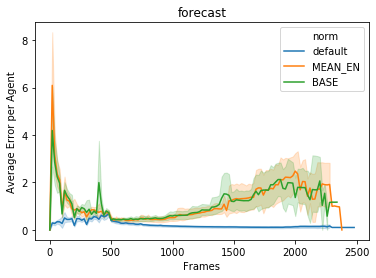

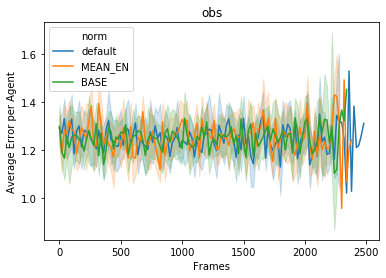

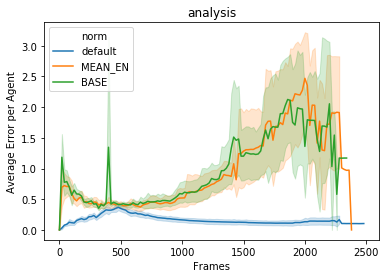

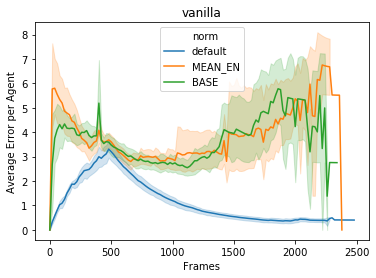

In [30]:
for var in df['variable'].unique():
    tdf = df.loc[df['variable']==var, :]
    plt.figure()
    sns.lineplot(data=tdf, x='time', y='value', hue='norm')
    plt.title(var)
    plt.xlabel('Frames')
    plt.ylabel('Average Error per Agent')
    plt.show()

### Visualising error by error metric for different normalisation types

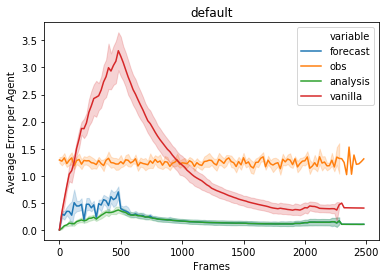

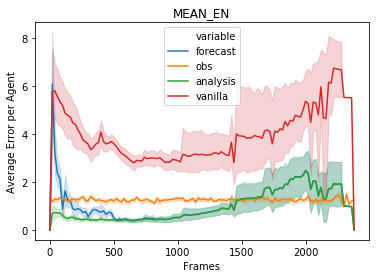

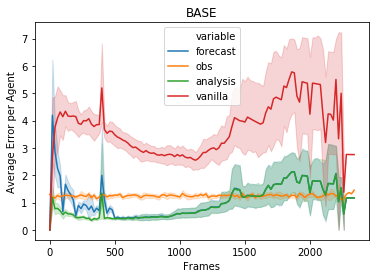

In [31]:
for n in df['norm'].unique():
    tdf = df.loc[df['norm']==n, :]
    plt.figure()
    sns.lineplot(data=tdf, x='time', y='value', hue='variable')
    plt.title(n)
    plt.xlabel('Frames')
    plt.ylabel('Average Error per Agent')
    plt.show()

### GCS

In [33]:
df = tidy_df.loc[tidy_df['station']=='Grand_Central', :]

### Visualising error by normalisation type for different error metrics

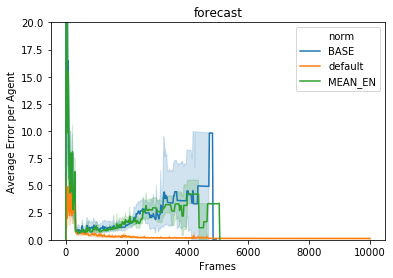

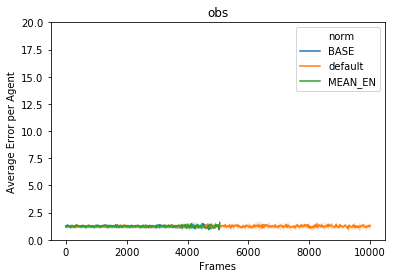

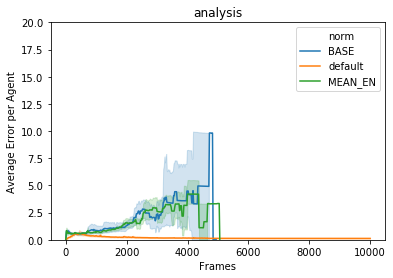

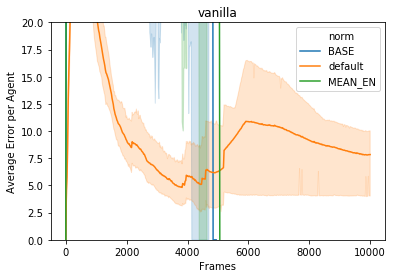

In [34]:
for var in df['variable'].unique():
    tdf = df.loc[df['variable']==var, :]
    plt.figure()
    sns.lineplot(data=tdf, x='time', y='value', hue='norm')
    plt.title(var)
    plt.xlabel('Frames')
    plt.ylabel('Average Error per Agent')
    plt.ylim((0, 20))
    plt.show()

### Visualising error by error metric for different normalisation types

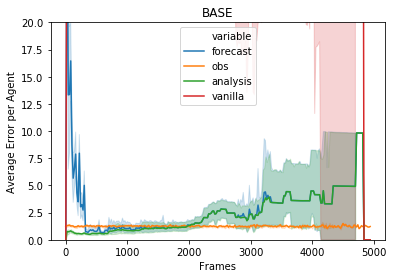

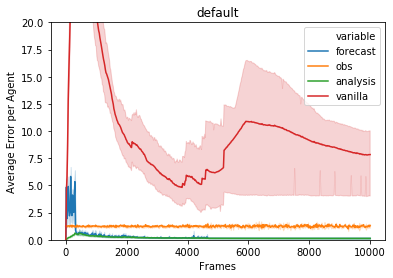

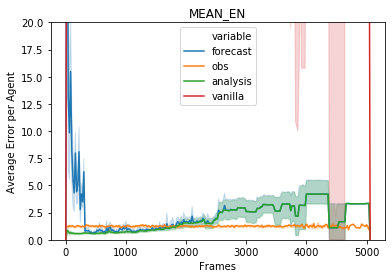

In [35]:
for n in df['norm'].unique():
    tdf = df.loc[df['norm']==n, :]
    plt.figure()
    sns.lineplot(data=tdf, x='time', y='value', hue='variable')
    plt.title(n)
    plt.xlabel('Frames')
    plt.ylabel('Average Error per Agent')
    plt.ylim((0, 20))
    plt.show()